In [ ]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-d48a846d-a341-f582-900f-4fd470617127)


#Get data

In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-09-07 19:21:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-09-07 19:21:33 (18.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


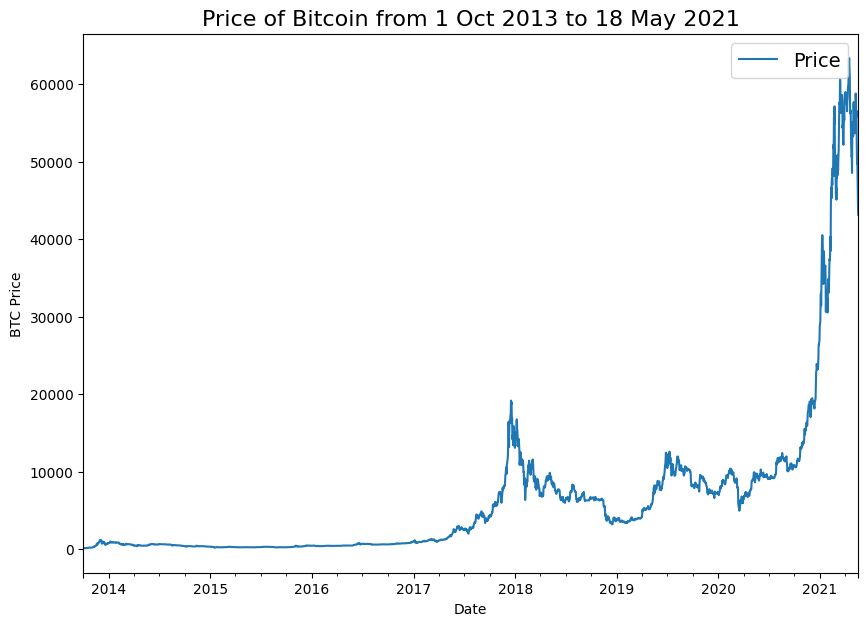

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

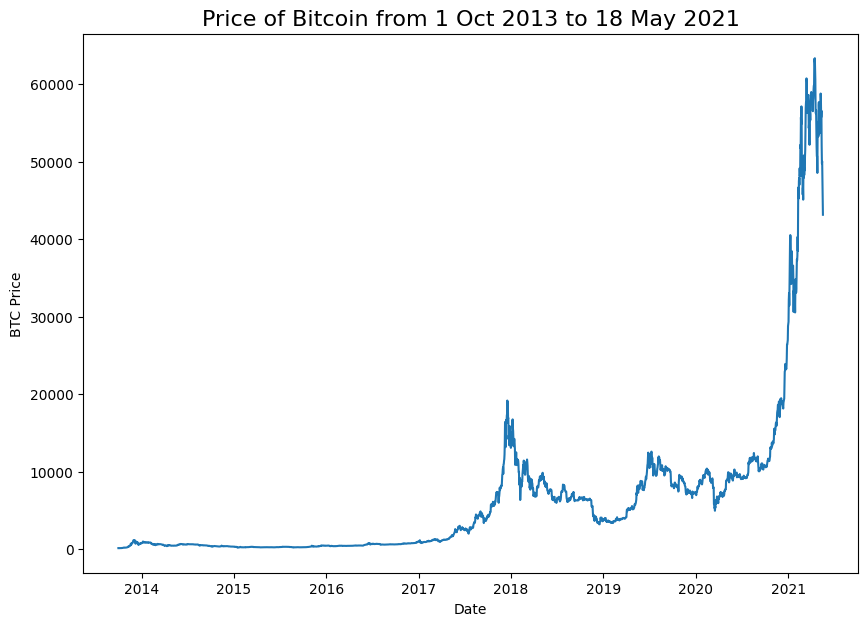

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [ ]:
datetime.strptime(line[1], "%Y-%m-%d")
(line[2])

'43144.4712908603'

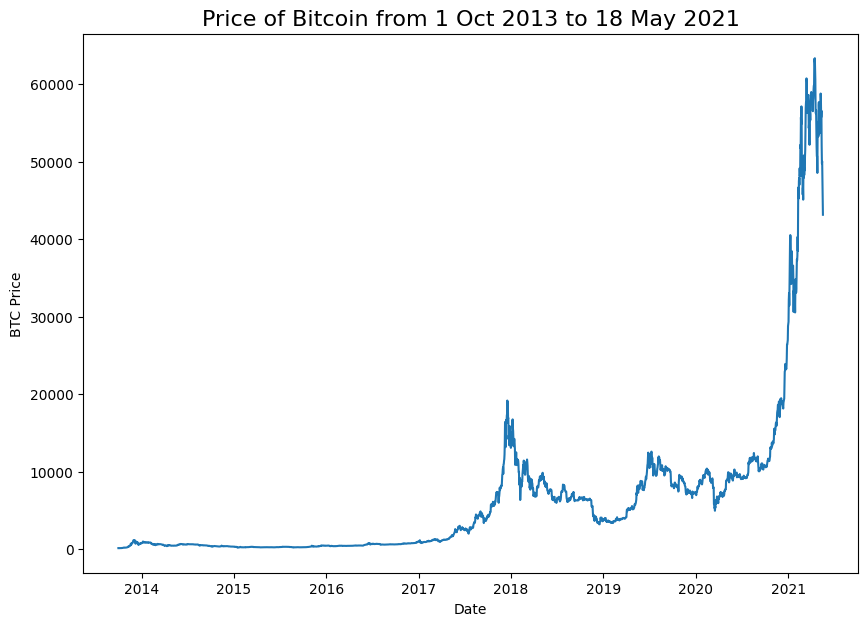

In [ ]:
#plot from csv
import numpy as np
plt.figure(figsize = (10,7))
plt.plot(timesteps, bitcoin_prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

#Format Data Part 1: Creating train and test sets for time series data

##Create train & test sets for time series (the wrong way)

In [ ]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

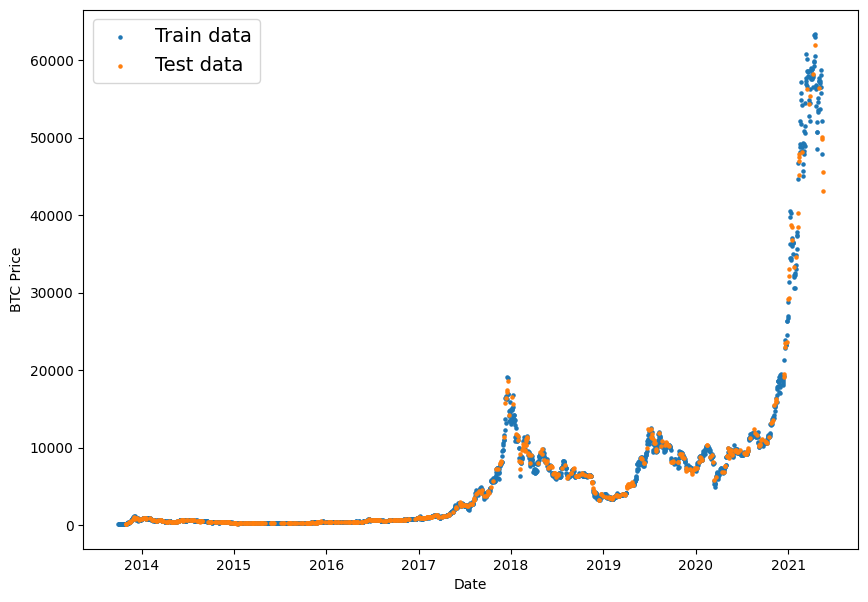

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
prices[:10], len(prices)

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]),
 2787)

#Create train & test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

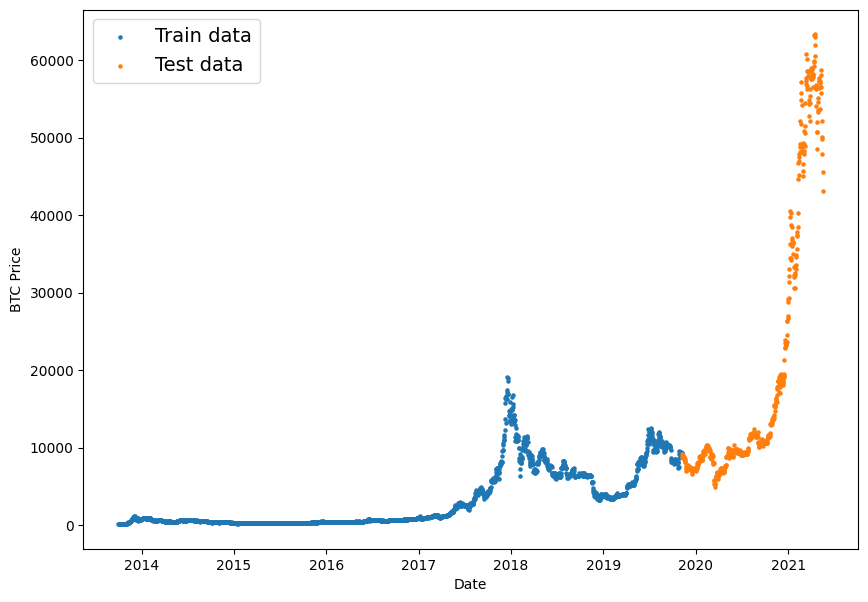

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#Creating a Plotting function

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

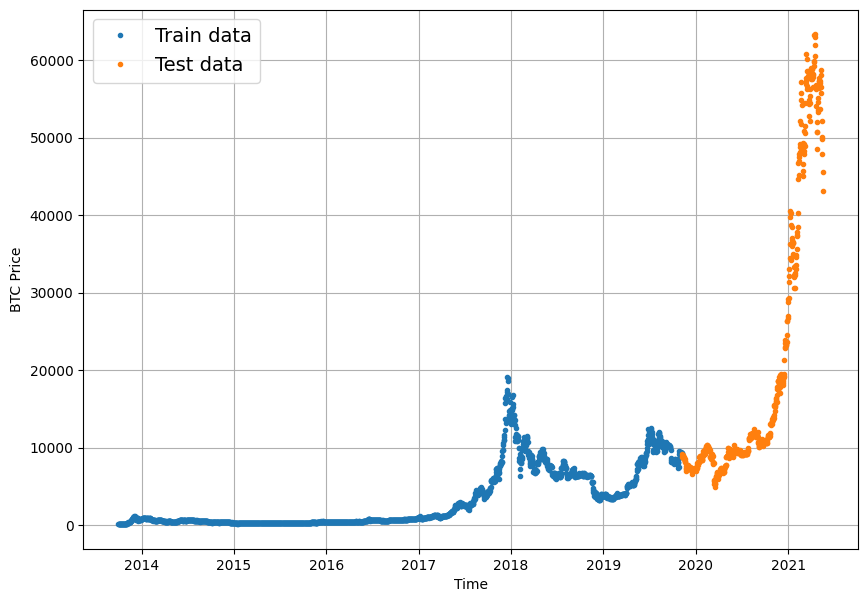

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

#Modelling Experiments

##Model 0: Naïve forecast (baseline)

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

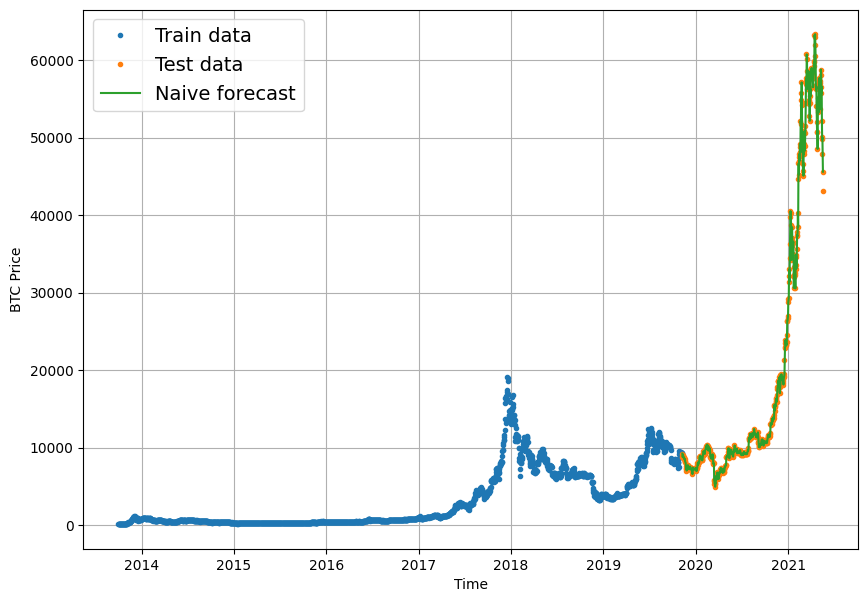

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

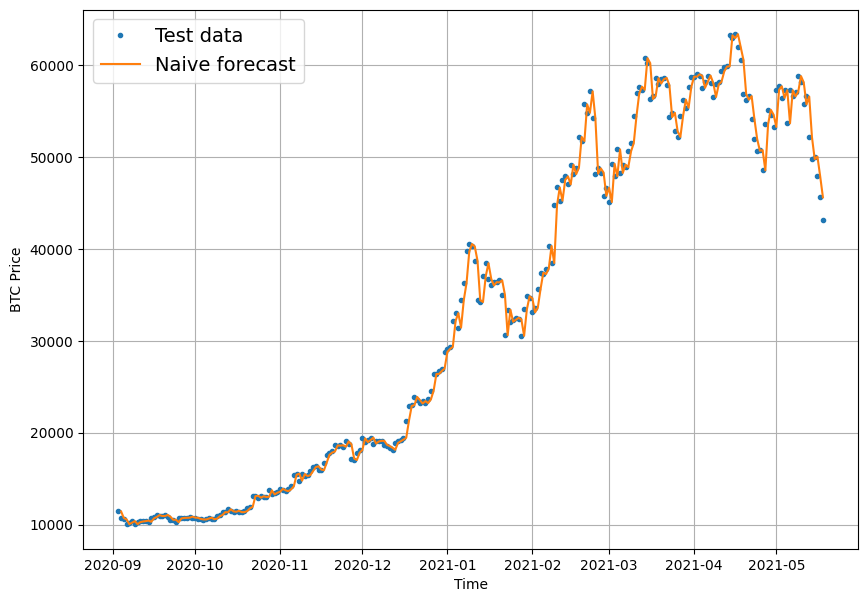

In [ ]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

In [ ]:
# Let's get TensorFlow!
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
y_test[:5], naive_forecast[:5]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]),
 array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917]))

In [ ]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)

naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
#find average price of bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

20056.632963737222

#Format Data Part 2 : Windowing Dataset

In [ ]:
#creating horizon and window
WINDOW_SIZE = 7
HORIZON = 1

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
test_window.shape, test_label.shape

(TensorShape([1, 7]), TensorShape([1, 1]))

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#view the first 3 windows/labels

for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


#Turning windows into training and testing sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
full_windows[:5], full_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_labels.shape, y_train.shape, train_windows.shape

((2224, 1), (2229,), (2224, 7))

In [ ]:
train_labels[:-HORIZON-1],  y_train[WINDOW_SIZE:]

(array([[ 123.033     ],
        [ 124.049     ],
        [ 125.96116   ],
        ...,
        [9369.62808116],
        [9326.59962378],
        [9335.75240233]]),
 array([ 123.033     ,  124.049     ,  125.96116   , ..., 9369.62808116,
        9326.59962378, 9335.75240233]))

In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

#Creating Model Checkpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

#Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
12/18 [===================>..........] - ETA: 0s - loss: 2455.6941 - mae: 2455.6941  

18/18 [==============================] - 7s 64ms/step - loss: 1950.9456 - mae: 1950.9456 - val_loss: 1414.6348 - val_mae: 1414.6348
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 378.6320 - mae: 378.6320 - val_loss: 1807.7573 - val_mae: 1807.7573
Epoch 3/100
18/18 [==============================] - ETA: 0s - loss: 249.7299 - mae: 249.7299

18/18 [==============================] - 1s 33ms/step - loss: 249.7299 - mae: 249.7299 - val_loss: 1270.1725 - val_mae: 1270.1725
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 214.1058 - mae: 214.1058

18/18 [==============================] - 1s 31ms/step - loss: 214.1058 - mae: 214.1058 - val_loss: 1141.1617 - val_mae: 1141.1617
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 207.9801 - mae: 207.9801 - val_loss: 1152.8887 - val_mae: 1152.8887
Epoch 6/100
18/18 [==============================] - ETA: 0s - loss: 194.4410 - mae: 194.4410

18/18 [==============================] - 1s 33ms/step - loss: 194.4410 - mae: 194.4410 - val_loss: 1074.1212 - val_mae: 1074.1212
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 188.9124 - mae: 188.9124

18/18 [==============================] - 1s 32ms/step - loss: 188.9124 - mae: 188.9124 - val_loss: 1065.2294 - val_mae: 1065.2294
Epoch 8/100
18/18 [==============================] - ETA: 0s - loss: 183.4575 - mae: 183.4575

18/18 [==============================] - 1s 33ms/step - loss: 183.4575 - mae: 183.4575 - val_loss: 1007.7851 - val_mae: 1007.7851
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 178.1633 - mae: 178.1633 - val_loss: 1019.3197 - val_mae: 1019.3197
Epoch 10/100
18/18 [==============================] - ETA: 0s - loss: 168.9701 - mae: 168.9701

18/18 [==============================] - 1s 44ms/step - loss: 168.9701 - mae: 168.9701 - val_loss: 896.7663 - val_mae: 896.7663
Epoch 11/100
18/18 [==============================] - ETA: 0s - loss: 158.5380 - mae: 158.5380

18/18 [==============================] - 1s 32ms/step - loss: 158.5380 - mae: 158.5380 - val_loss: 872.4274 - val_mae: 872.4274
Epoch 12/100
18/18 [==============================] - ETA: 0s - loss: 151.8493 - mae: 151.8493

18/18 [==============================] - 1s 34ms/step - loss: 151.8493 - mae: 151.8493 - val_loss: 854.9846 - val_mae: 854.9846
Epoch 13/100
18/18 [==============================] - 0s 6ms/step - loss: 149.8136 - mae: 149.8136 - val_loss: 931.9889 - val_mae: 931.9889
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 145.0782 - mae: 145.0782 - val_loss: 868.0645 - val_mae: 868.0645
Epoch 15/100
18/18 [==============================] - ETA: 0s - loss: 140.3876 - mae: 140.3876

18/18 [==============================] - 1s 33ms/step - loss: 140.3876 - mae: 140.3876 - val_loss: 767.7965 - val_mae: 767.7965
Epoch 16/100
18/18 [==============================] - 0s 6ms/step - loss: 134.1350 - mae: 134.1350 - val_loss: 779.5541 - val_mae: 779.5541
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 130.8497 - mae: 130.8497 - val_loss: 768.1354 - val_mae: 768.1354
Epoch 18/100
18/18 [==============================] - ETA: 0s - loss: 129.5521 - mae: 129.5521

18/18 [==============================] - 1s 33ms/step - loss: 129.5521 - mae: 129.5521 - val_loss: 736.8769 - val_mae: 736.8769
Epoch 19/100
18/18 [==============================] - ETA: 0s - loss: 124.8960 - mae: 124.8960

18/18 [==============================] - 1s 34ms/step - loss: 124.8960 - mae: 124.8960 - val_loss: 716.3947 - val_mae: 716.3947
Epoch 20/100
18/18 [==============================] - ETA: 0s - loss: 122.4949 - mae: 122.4949

18/18 [==============================] - 1s 33ms/step - loss: 122.4949 - mae: 122.4949 - val_loss: 679.6467 - val_mae: 679.6467
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 150.8421 - mae: 150.8421

18/18 [==============================] - 1s 31ms/step - loss: 125.2357 - mae: 125.2357 - val_loss: 667.8078 - val_mae: 667.8078
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 120.9820 - mae: 120.9820 - val_loss: 669.4265 - val_mae: 669.4265
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 119.5469 - mae: 119.5469

18/18 [==============================] - 1s 32ms/step - loss: 122.6996 - mae: 122.6996 - val_loss: 649.9924 - val_mae: 649.9924
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 119.2433 - mae: 119.2433

18/18 [==============================] - 1s 31ms/step - loss: 119.2433 - mae: 119.2433 - val_loss: 647.8567 - val_mae: 647.8567
Epoch 25/100
18/18 [==============================] - ETA: 0s - loss: 117.8762 - mae: 117.8762

18/18 [==============================] - 1s 46ms/step - loss: 117.8762 - mae: 117.8762 - val_loss: 636.8996 - val_mae: 636.8996
Epoch 26/100
18/18 [==============================] - 0s 8ms/step - loss: 117.6497 - mae: 117.6497 - val_loss: 639.9307 - val_mae: 639.9307
Epoch 27/100
11/18 [=================>............] - ETA: 0s - loss: 123.5683 - mae: 123.5683

18/18 [==============================] - 1s 47ms/step - loss: 118.7546 - mae: 118.7546 - val_loss: 628.2230 - val_mae: 628.2230
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 115.4583 - mae: 115.4583

18/18 [==============================] - 1s 49ms/step - loss: 114.5456 - mae: 114.5456 - val_loss: 625.0509 - val_mae: 625.0509
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 113.7738 - mae: 113.7738

18/18 [==============================] - 1s 32ms/step - loss: 113.7738 - mae: 113.7738 - val_loss: 624.7548 - val_mae: 624.7548
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 118.3628 - mae: 118.3628

18/18 [==============================] - 1s 48ms/step - loss: 118.3628 - mae: 118.3628 - val_loss: 618.3922 - val_mae: 618.3922
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 116.0857 - mae: 116.0857 - val_loss: 637.4456 - val_mae: 637.4456
Epoch 32/100
17/18 [===========================>..] - ETA: 0s - loss: 113.8185 - mae: 113.8185

18/18 [==============================] - 1s 32ms/step - loss: 113.2254 - mae: 113.2254 - val_loss: 618.2468 - val_mae: 618.2468
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 112.6597 - mae: 112.6597 - val_loss: 630.1756 - val_mae: 630.1756
Epoch 34/100
18/18 [==============================] - ETA: 0s - loss: 113.3494 - mae: 113.3494

18/18 [==============================] - 1s 31ms/step - loss: 113.3494 - mae: 113.3494 - val_loss: 608.9929 - val_mae: 608.9929
Epoch 35/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0033 - mae: 112.0033 - val_loss: 633.3322 - val_mae: 633.3322
Epoch 36/100
15/18 [========================>.....] - ETA: 0s - loss: 112.0044 - mae: 112.0044

18/18 [==============================] - 1s 32ms/step - loss: 113.7333 - mae: 113.7333 - val_loss: 601.9078 - val_mae: 601.9078
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 110.4884 - mae: 110.4884

18/18 [==============================] - 1s 32ms/step - loss: 110.4884 - mae: 110.4884 - val_loss: 600.9543 - val_mae: 600.9543
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 112.1718 - mae: 112.1718

18/18 [==============================] - 1s 31ms/step - loss: 111.8556 - mae: 111.8556 - val_loss: 600.2526 - val_mae: 600.2526
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4324 - mae: 111.4324 - val_loss: 604.5387 - val_mae: 604.5387
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7317 - mae: 110.7317 - val_loss: 613.3036 - val_mae: 613.3036
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 110.1943 - mae: 110.1943

18/18 [==============================] - 1s 33ms/step - loss: 110.1943 - mae: 110.1943 - val_loss: 595.4050 - val_mae: 595.4050
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 114.6250 - mae: 114.6250 - val_loss: 651.8207 - val_mae: 651.8207
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 115.6438 - mae: 115.6438 - val_loss: 683.3984 - val_mae: 683.3984
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 118.8722 - mae: 118.8722

18/18 [==============================] - 1s 34ms/step - loss: 118.3345 - mae: 118.3345 - val_loss: 592.5109 - val_mae: 592.5109
Epoch 45/100
18/18 [==============================] - 0s 7ms/step - loss: 111.8056 - mae: 111.8056 - val_loss: 594.1516 - val_mae: 594.1516
Epoch 46/100
18/18 [==============================] - ETA: 0s - loss: 113.1006 - mae: 113.1006

18/18 [==============================] - 1s 31ms/step - loss: 113.1006 - mae: 113.1006 - val_loss: 589.4491 - val_mae: 589.4491
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 112.0002 - mae: 112.0002 - val_loss: 660.2397 - val_mae: 660.2397
Epoch 48/100
18/18 [==============================] - ETA: 0s - loss: 110.4668 - mae: 110.4668

18/18 [==============================] - 1s 32ms/step - loss: 110.4668 - mae: 110.4668 - val_loss: 588.4733 - val_mae: 588.4733
Epoch 49/100
18/18 [==============================] - 0s 6ms/step - loss: 110.2851 - mae: 110.2851 - val_loss: 714.5088 - val_mae: 714.5088
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 119.6588 - mae: 119.6588 - val_loss: 588.6484 - val_mae: 588.6484
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 110.1100 - mae: 110.1100 - val_loss: 588.8741 - val_mae: 588.8741
Epoch 52/100
18/18 [==============================] - ETA: 0s - loss: 110.1459 - mae: 110.1459

18/18 [==============================] - 1s 34ms/step - loss: 110.1459 - mae: 110.1459 - val_loss: 586.6668 - val_mae: 586.6668
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1077 - mae: 111.1077 - val_loss: 626.5646 - val_mae: 626.5646
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1689 - mae: 109.1689 - val_loss: 597.9796 - val_mae: 597.9796
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8005 - mae: 112.8005 - val_loss: 603.0636 - val_mae: 603.0636
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4261 - mae: 113.4261 - val_loss: 813.3077 - val_mae: 813.3077
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 131.9379 - mae: 131.9379 - val_loss: 735.6648 - val_mae: 735.6648
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 116.8307 - mae: 116.8307

18/18 [==============================] - 1s 32ms/step - loss: 116.8307 - mae: 116.8307 - val_loss: 585.5399 - val_mae: 585.5399
Epoch 59/100
17/18 [===========================>..] - ETA: 0s - loss: 106.7196 - mae: 106.7196

18/18 [==============================] - 1s 36ms/step - loss: 107.8234 - mae: 107.8234 - val_loss: 583.2896 - val_mae: 583.2896
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 107.4191 - mae: 107.4191 - val_loss: 592.1149 - val_mae: 592.1149
Epoch 61/100
10/18 [===============>..............] - ETA: 0s - loss: 103.0025 - mae: 103.0025

18/18 [==============================] - 1s 49ms/step - loss: 108.2838 - mae: 108.2838 - val_loss: 582.0656 - val_mae: 582.0656
Epoch 62/100
18/18 [==============================] - 0s 8ms/step - loss: 107.2782 - mae: 107.2782 - val_loss: 605.9763 - val_mae: 605.9763
Epoch 63/100
18/18 [==============================] - 0s 9ms/step - loss: 111.9479 - mae: 111.9479 - val_loss: 653.8074 - val_mae: 653.8074
Epoch 64/100
12/18 [===================>..........] - ETA: 0s - loss: 114.6506 - mae: 114.6506

18/18 [==============================] - 1s 55ms/step - loss: 110.9327 - mae: 110.9327 - val_loss: 581.3894 - val_mae: 581.3894
Epoch 65/100
18/18 [==============================] - 0s 10ms/step - loss: 107.7587 - mae: 107.7587 - val_loss: 587.7616 - val_mae: 587.7616
Epoch 66/100
18/18 [==============================] - 0s 13ms/step - loss: 108.2807 - mae: 108.2807 - val_loss: 596.3166 - val_mae: 596.3166
Epoch 67/100
18/18 [==============================] - 0s 11ms/step - loss: 110.7029 - mae: 110.7029 - val_loss: 680.3073 - val_mae: 680.3073
Epoch 68/100
18/18 [==============================] - 0s 10ms/step - loss: 125.7919 - mae: 125.7919 - val_loss: 787.3044 - val_mae: 787.3044
Epoch 69/100
18/18 [==============================] - 0s 8ms/step - loss: 131.9454 - mae: 131.9454 - val_loss: 674.4756 - val_mae: 674.4756
Epoch 70/100
12/18 [===================>..........] - ETA: 0s - loss: 122.1698 - mae: 122.1698

18/18 [==============================] - 1s 47ms/step - loss: 122.9177 - mae: 122.9177 - val_loss: 579.6160 - val_mae: 579.6160
Epoch 71/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3068 - mae: 112.3068 - val_loss: 613.3401 - val_mae: 613.3401
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 107.7395 - mae: 107.7395 - val_loss: 584.1097 - val_mae: 584.1097
Epoch 73/100
14/18 [======================>.......] - ETA: 0s - loss: 110.4874 - mae: 110.4874

18/18 [==============================] - 1s 56ms/step - loss: 109.0420 - mae: 109.0420 - val_loss: 578.0532 - val_mae: 578.0532
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6532 - mae: 108.6532 - val_loss: 590.0367 - val_mae: 590.0367
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5806 - mae: 108.5806 - val_loss: 584.2674 - val_mae: 584.2674
Epoch 76/100
18/18 [==============================] - ETA: 0s - loss: 108.8027 - mae: 108.8027

18/18 [==============================] - 1s 33ms/step - loss: 108.8027 - mae: 108.8027 - val_loss: 577.2844 - val_mae: 577.2844
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4753 - mae: 108.4753 - val_loss: 579.9308 - val_mae: 579.9308
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 108.0019 - mae: 108.0019 - val_loss: 578.7009 - val_mae: 578.7009
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 107.2367 - mae: 107.2367 - val_loss: 584.4897 - val_mae: 584.4897
Epoch 80/100
 1/18 [>.............................] - ETA: 0s - loss: 118.6708 - mae: 118.6708

18/18 [==============================] - 1s 30ms/step - loss: 110.6672 - mae: 110.6672 - val_loss: 576.5900 - val_mae: 576.5900
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 106.1837 - mae: 106.1837 - val_loss: 603.7698 - val_mae: 603.7698
Epoch 82/100
18/18 [==============================] - ETA: 0s - loss: 115.9786 - mae: 115.9786

18/18 [==============================] - 1s 32ms/step - loss: 115.9786 - mae: 115.9786 - val_loss: 575.5223 - val_mae: 575.5223
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7540 - mae: 112.7540 - val_loss: 672.4083 - val_mae: 672.4083
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2508 - mae: 113.2508 - val_loss: 605.9139 - val_mae: 605.9139
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 108.3230 - mae: 108.3230 - val_loss: 588.1199 - val_mae: 588.1199
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 107.4982 - mae: 107.4982 - val_loss: 591.8051 - val_mae: 591.8051
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1024 - mae: 107.1024 - val_loss: 602.7809 - val_mae: 602.7809
Epoch 88/100
18/18 [==============================] - 0s 6ms/step - loss: 108.6127 - mae: 108.6127 - val_loss: 575.6268 - val_mae: 575.6268
Epoch 89/100
18/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 109.4508 - mae: 109.4508 - val_loss: 574.4213 - val_mae: 574.4213
Epoch 92/100
15/18 [========================>.....] - ETA: 0s - loss: 109.8970 - mae: 109.8970

18/18 [==============================] - 1s 32ms/step - loss: 111.4980 - mae: 111.4980 - val_loss: 573.8513 - val_mae: 573.8513
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 113.9755 - mae: 113.9755 - val_loss: 603.3830 - val_mae: 603.3830
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 111.0755 - mae: 111.0755 - val_loss: 587.3479 - val_mae: 587.3479
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3879 - mae: 107.3879 - val_loss: 597.7591 - val_mae: 597.7591
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 107.3181 - mae: 107.3181 - val_loss: 578.4770 - val_mae: 578.4770
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 105.9715 - mae: 105.9715 - val_loss: 583.8432 - val_mae: 583.8432
Epoch 98/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0248 - mae: 106.0248 - val_loss: 574.1241 - val_mae: 574.1241
Epoch 99/100
17/18 [============

18/18 [==============================] - 1s 31ms/step - loss: 108.9731 - mae: 108.9731 - val_loss: 572.1997 - val_mae: 572.1997
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 111.1778 - mae: 111.1778 - val_loss: 627.6046 - val_mae: 627.6046


In [ ]:
train_windows.shape, train_labels.shape

((2224, 7), (2224, 1))

In [ ]:
#evaluate on test_data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 627.6045 - mae: 627.6045


[627.6044921875, 627.6044921875]

In [ ]:
#load in saved best performing model_1 and evaluate on test data

model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 572.1998 - mae: 572.1998


[572.1998291015625, 572.1998291015625]

#Making forecast with a Model (on the test dataset)

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8868.883, 8770.454, 9036.969, 8804.438, 8734.233, 8740.573,
        8707.156, 8509.858, 8470.331, 8530.664], dtype=float32)>)

In [ ]:
test_labels[:5]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102]])

In [ ]:
#evalute preds

model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

model_1_results

{'mae': 572.1998,
 'mse': 1180015.0,
 'rmse': 1086.2849,
 'mape': 2.5692577,
 'mase': 1.0051966}

In [ ]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
arr = [1,2,3,4,5,6,7]
print(arr[-4:])

[4, 5, 6, 7]


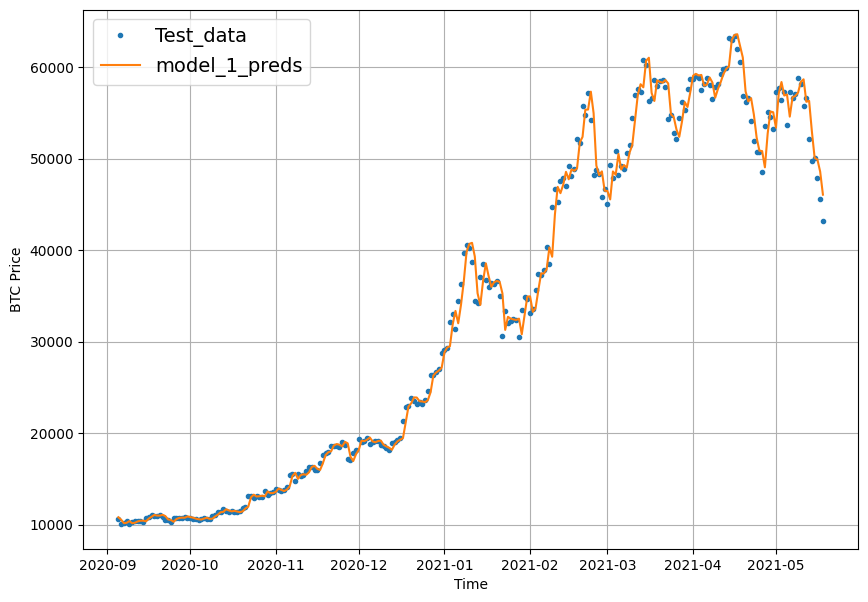

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

#Model 2 : Dense(window = 30, horizon = 1)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30


In [ ]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
#make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2205, 2205, 552, 552)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([

      layers.Dense(128, activation = "relu"),
      layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs = 100,
            batch_size = 128,
            verbose = 0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [ ]:
#evaluate model_2 preds
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 610.2013


610.2012939453125

In [ ]:
#load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 598.0912


598.0912475585938

In [ ]:
#get forecast predictions
model_2_preds = make_preds(model_2, test_windows)

18/18 [==============================] - 0s 2ms/step


In [ ]:
#evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)
model_2_results

{'mae': 598.09125,
 'mse': 1250454.2,
 'rmse': 1118.237,
 'mape': 2.7676966,
 'mase': 1.0454694}

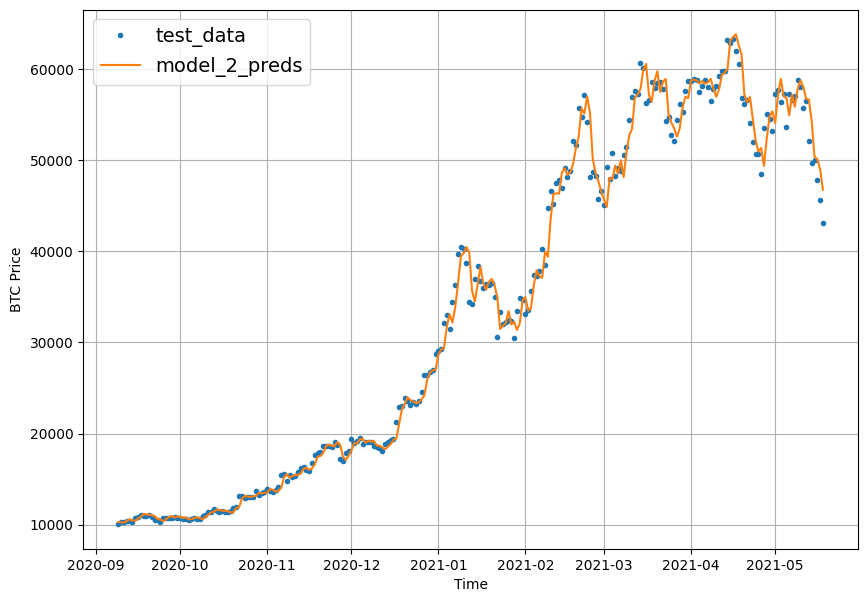

In [ ]:
offset = 300
plt.figure(figsize = (10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

#Model 3 : Dense (window = 30, horizon= 7)

In [ ]:
prices[:5]

array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866])

In [ ]:

HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([

      layers.Dense(128, activation = "relu"),
      layers.Dense(HORIZON)
], name = "model_3_dense")

model_3.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = create_model_checkpoint(model_name = model_3.name))

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2352.5635 

18/18 [==============================] - 2s 37ms/step - loss: 2352.5635 - val_loss: 4840.3325
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 627.9227

18/18 [==============================] - 1s 38ms/step - loss: 627.9227 - val_loss: 2517.7324
Epoch 3/100
13/18 [====================>.........] - ETA: 0s - loss: 450.8891

18/18 [==============================] - 1s 45ms/step - loss: 438.4375 - val_loss: 2129.3201
Epoch 4/100
13/18 [====================>.........] - ETA: 0s - loss: 388.2462

18/18 [==============================] - 1s 45ms/step - loss: 386.3965 - val_loss: 1953.0145
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 354.0268 - val_loss: 1998.2164
Epoch 6/100
13/18 [====================>.........] - ETA: 0s - loss: 332.5538

18/18 [==============================] - 1s 39ms/step - loss: 329.1371 - val_loss: 1737.6117
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 305.3676

18/18 [==============================] - 1s 31ms/step - loss: 305.3676 - val_loss: 1651.9934
Epoch 8/100
17/18 [===========================>..] - ETA: 0s - loss: 292.1668

18/18 [==============================] - 1s 31ms/step - loss: 293.2942 - val_loss: 1485.1708
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 277.2791 - val_loss: 1615.2467
Epoch 10/100
18/18 [==============================] - 0s 6ms/step - loss: 279.1110 - val_loss: 1529.4996
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 281.8466

18/18 [==============================] - 1s 31ms/step - loss: 270.4137 - val_loss: 1466.5331
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 262.5242 - val_loss: 1520.2585
Epoch 13/100
 1/18 [>.............................] - ETA: 0s - loss: 234.0184

18/18 [==============================] - 1s 31ms/step - loss: 262.6547 - val_loss: 1405.2777
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 248.2262

18/18 [==============================] - 1s 31ms/step - loss: 258.4085 - val_loss: 1385.3442
Epoch 15/100
18/18 [==============================] - 0s 5ms/step - loss: 252.0560 - val_loss: 1450.1606
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 251.8774 - val_loss: 1406.9606
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 250.8754 - val_loss: 1501.2052
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 252.3253 - val_loss: 1388.6121
Epoch 19/100
18/18 [==============================] - 0s 5ms/step - loss: 244.7950 - val_loss: 1568.7294
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 253.3035 - val_loss: 1418.0690
Epoch 21/100
18/18 [==============================] - 0s 5ms/step - loss: 246.1823 - val_loss: 1399.7048
Epoch 22/100
15/18 [========================>.....] - ETA: 0s - loss: 250.8584

18/18 [==============================] - 1s 30ms/step - loss: 248.5776 - val_loss: 1359.1919
Epoch 23/100
18/18 [==============================] - 0s 5ms/step - loss: 245.4497 - val_loss: 1369.1556
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 295.1835

18/18 [==============================] - 1s 48ms/step - loss: 256.8137 - val_loss: 1344.4150
Epoch 25/100
18/18 [==============================] - 0s 6ms/step - loss: 248.6879 - val_loss: 1641.3948
Epoch 26/100
18/18 [==============================] - 0s 5ms/step - loss: 248.8647 - val_loss: 1469.0483
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 240.7553 - val_loss: 1423.6976
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 224.2014

18/18 [==============================] - 1s 31ms/step - loss: 237.4602 - val_loss: 1339.9813
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 238.5648

18/18 [==============================] - 1s 31ms/step - loss: 237.2747 - val_loss: 1335.4274
Epoch 30/100
18/18 [==============================] - 0s 6ms/step - loss: 243.2845 - val_loss: 1389.3157
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 238.2790

18/18 [==============================] - 1s 30ms/step - loss: 239.7266 - val_loss: 1330.5397
Epoch 32/100
18/18 [==============================] - ETA: 0s - loss: 240.4394

18/18 [==============================] - 1s 31ms/step - loss: 240.4394 - val_loss: 1308.5922
Epoch 33/100
18/18 [==============================] - 0s 5ms/step - loss: 236.7149 - val_loss: 1336.8591
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 237.0370 - val_loss: 1348.5002
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 238.9467 - val_loss: 1327.9214
Epoch 36/100
18/18 [==============================] - 0s 4ms/step - loss: 235.1985 - val_loss: 1341.8048
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 249.3541 - val_loss: 1331.2124
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 233.7910 - val_loss: 1385.2858
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 237.8220 - val_loss: 1333.0887
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 232.2320 - val_loss: 1419.5352
Epoch 41/100
18/18 [==============================] - 0s 5ms/step -

18/18 [==============================] - 1s 30ms/step - loss: 234.6810 - val_loss: 1306.4384
Epoch 45/100
18/18 [==============================] - 0s 6ms/step - loss: 234.8546 - val_loss: 1545.5184
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 261.4680

18/18 [==============================] - 1s 39ms/step - loss: 240.8990 - val_loss: 1289.0038
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 234.4300 - val_loss: 1423.0695
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 237.4438 - val_loss: 1310.5463
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 245.7412 - val_loss: 1393.4767
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 237.4722 - val_loss: 1322.9387
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 227.6189 - val_loss: 1450.7557
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 229.5995 - val_loss: 1305.0891
Epoch 53/100
15/18 [========================>.....] - ETA: 0s - loss: 231.9906

18/18 [==============================] - 1s 47ms/step - loss: 227.9822 - val_loss: 1274.0924
Epoch 54/100
14/18 [======================>.......] - ETA: 0s - loss: 230.9300

18/18 [==============================] - 1s 43ms/step - loss: 230.3885 - val_loss: 1255.8978
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 232.3732 - val_loss: 1372.4984
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 228.1810 - val_loss: 1290.4197
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 230.3731 - val_loss: 1325.3928
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 228.7267 - val_loss: 1263.3116
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 226.4849 - val_loss: 1259.7230
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 228.6046 - val_loss: 1267.3420
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 226.6115 - val_loss: 1396.2478
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 232.6076 - val_loss: 1275.5522
Epoch 63/100
18/18 [==============================] - 0s 5ms/step -

18/18 [==============================] - 1s 31ms/step - loss: 229.9538 - val_loss: 1244.9918
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 223.5643 - val_loss: 1246.3369
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 224.0135 - val_loss: 1385.1320
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 225.0936 - val_loss: 1415.4301
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 229.2933 - val_loss: 1303.0275
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 211.2040

18/18 [==============================] - 1s 30ms/step - loss: 223.7264 - val_loss: 1232.7260
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 225.3500 - val_loss: 1266.1539
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 228.1447 - val_loss: 1342.1851
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 231.7170 - val_loss: 1277.9792
Epoch 81/100
13/18 [====================>.........] - ETA: 0s - loss: 237.4931

18/18 [==============================] - 1s 32ms/step - loss: 228.4225 - val_loss: 1222.4396
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 226.9133 - val_loss: 1307.2180
Epoch 83/100
18/18 [==============================] - 0s 6ms/step - loss: 224.5712 - val_loss: 1349.4614
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 223.9721 - val_loss: 1239.9841
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 224.1000 - val_loss: 1277.0513
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 224.2972 - val_loss: 1317.0481
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 227.9380 - val_loss: 1395.9756
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 227.9258 - val_loss: 1464.6090
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 231.7797 - val_loss: 1288.3140
Epoch 90/100
18/18 [==============================] - 0s 6ms/step -

In [ ]:
#evaluate the model
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1342.5476


1342.547607421875

In [ ]:
#load the best performing model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1222.4396


1222.4395751953125

In [ ]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:3]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9487.131 , 9414.676 , 9155.928 , 9514.506 , 9480.85  , 9770.039 ,
        9572.106 ],
       [9028.001 , 8825.6875, 8903.597 , 9208.08  , 9050.079 , 9169.011 ,
        9217.964 ],
       [8786.811 , 8612.916 , 8956.292 , 8960.775 , 8923.779 , 9215.397 ,
        9303.1455]], dtype=float32)>

In [ ]:
test_labels.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

In [ ]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)

model_3_results

{'mae': array([  691.81866 ,   379.23242 ,   373.5851  ,   542.8571  ,
          519.36774 ,   601.5136  ,   589.8245  ,   578.6552  ,
          522.367   ,   581.41956 ,   821.9419  ,   878.30634 ,
          912.3201  ,   965.11487 ,   780.639   ,   371.8042  ,
          127.75579 ,   181.44434 ,   246.66853 ,   239.53201 ,
          212.31578 ,   234.48772 ,   400.47357 ,   385.83182 ,
          195.62459 ,   117.357285,   125.60449 ,   143.46883 ,
          145.11203 ,   177.34758 ,   283.10184 ,   347.30795 ,
          314.13754 ,   352.0695  ,   288.6767  ,   299.2403  ,
          356.86957 ,   268.91205 ,   260.64572 ,   215.13972 ,
          397.4477  ,    81.94099 ,    92.68213 ,   126.54618 ,
          142.2357  ,   155.91057 ,   146.33328 ,   153.0782  ,
          121.99421 ,   127.64655 ,   171.04088 ,   149.74338 ,
          190.2136  ,   216.27742 ,   219.32164 ,   340.43387 ,
          445.10623 ,   463.32895 ,   462.61334 ,   438.63742 ,
          350.20035 ,    98.88546

#Make our evaluation function work for larger horizons

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1222.4396,
 'mse': 5290366.0,
 'rmse': 1408.0481,
 'mape': 5.582207,
 'mase': 2.175263}

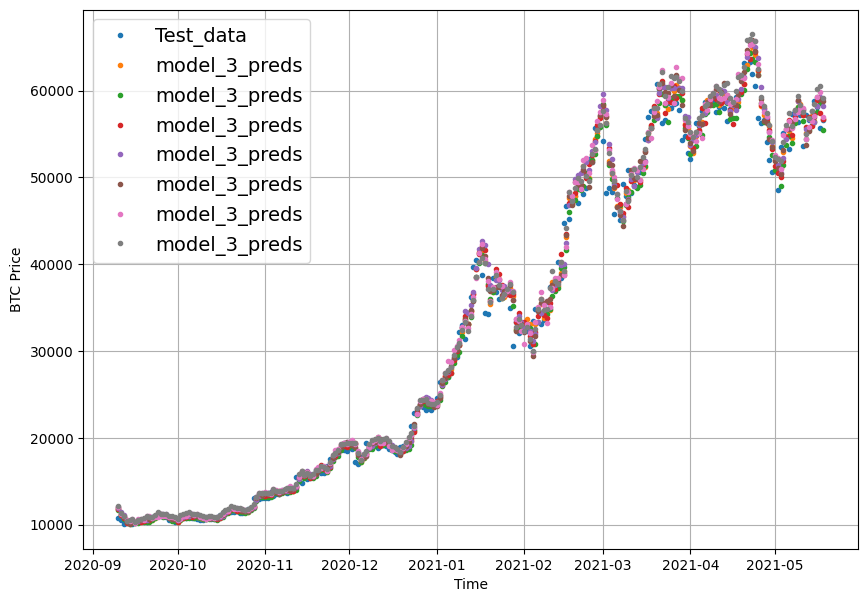

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

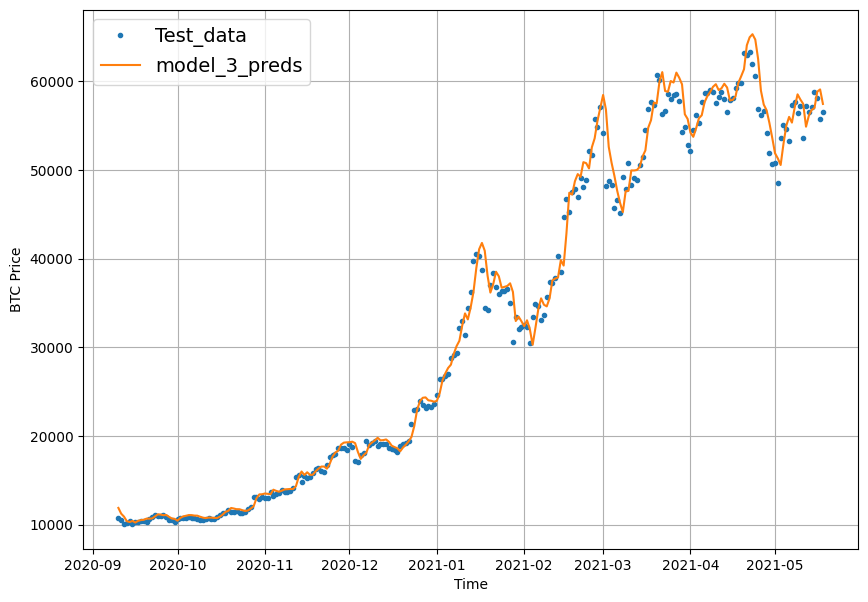

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

#Which of our models is performing best so far?

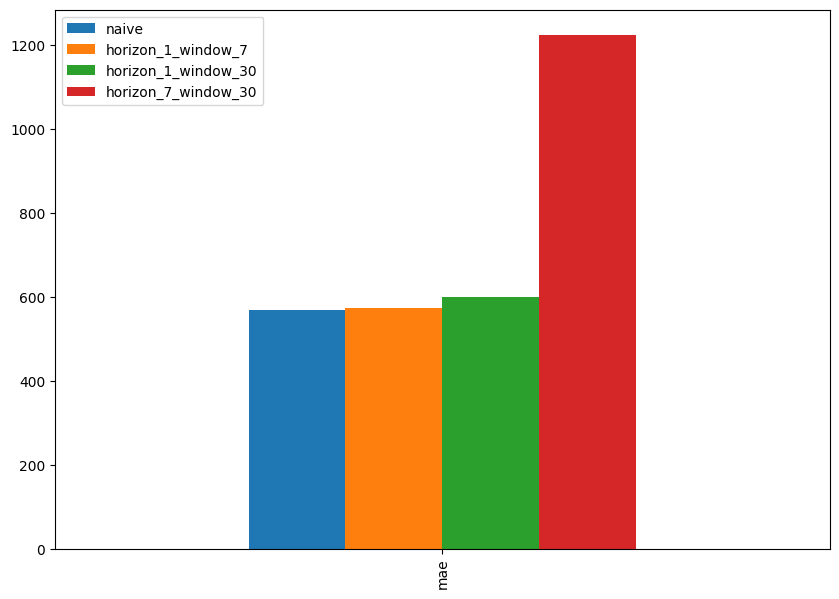

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

#Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
#create window dataset
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
#create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([

      layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
      layers.Conv1D(filters = 128, kernel_size = 5, padding = "causal", activation = "relu"),
      layers.Dense(HORIZON)
], name = "model_4_conv1D")

model_4.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose = 1,
            validation_data = (test_windows, test_labels),
            callbacks = create_model_checkpoint(model_name = model_4.name))

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1425.8748 

18/18 [==============================] - 3s 52ms/step - loss: 1340.9866 - val_loss: 2885.9578
Epoch 2/100
16/18 [=========================>....] - ETA: 0s - loss: 366.5175

18/18 [==============================] - 1s 43ms/step - loss: 355.0490 - val_loss: 1519.6959
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 217.4986

18/18 [==============================] - 1s 43ms/step - loss: 209.6408 - val_loss: 1276.4149
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 193.5009

18/18 [==============================] - 1s 59ms/step - loss: 193.3278 - val_loss: 1069.4753
Epoch 5/100
11/18 [=================>............] - ETA: 0s - loss: 196.0079

18/18 [==============================] - 1s 62ms/step - loss: 187.3737 - val_loss: 1044.8624
Epoch 6/100
10/18 [===============>..............] - ETA: 0s - loss: 184.4209

18/18 [==============================] - 1s 49ms/step - loss: 187.1212 - val_loss: 1026.4017
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 181.6074 - val_loss: 1050.2960
Epoch 8/100
16/18 [=========================>....] - ETA: 0s - loss: 177.0310

18/18 [==============================] - 1s 42ms/step - loss: 178.3516 - val_loss: 981.4036
Epoch 9/100
18/18 [==============================] - 0s 6ms/step - loss: 175.7792 - val_loss: 996.7628
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 169.8580

18/18 [==============================] - 1s 43ms/step - loss: 171.1133 - val_loss: 950.1457
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 166.5453

18/18 [==============================] - 1s 42ms/step - loss: 166.3218 - val_loss: 921.7974
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 163.9606 - val_loss: 1060.7284
Epoch 13/100
16/18 [=========================>....] - ETA: 0s - loss: 163.2448

18/18 [==============================] - 1s 44ms/step - loss: 164.3976 - val_loss: 907.3129
Epoch 14/100
18/18 [==============================] - 0s 6ms/step - loss: 157.2059 - val_loss: 907.9295
Epoch 15/100
18/18 [==============================] - 0s 6ms/step - loss: 156.0239 - val_loss: 925.2910
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 149.7317

18/18 [==============================] - 1s 42ms/step - loss: 151.4328 - val_loss: 880.7116
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 147.8176

18/18 [==============================] - 1s 67ms/step - loss: 149.5468 - val_loss: 872.3976
Epoch 18/100
16/18 [=========================>....] - ETA: 0s - loss: 153.6351

18/18 [==============================] - 1s 42ms/step - loss: 148.6599 - val_loss: 836.1867
Epoch 19/100
17/18 [===========================>..] - ETA: 0s - loss: 143.9521

18/18 [==============================] - 1s 42ms/step - loss: 143.1076 - val_loss: 807.0522
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 143.0961

18/18 [==============================] - 1s 42ms/step - loss: 143.3402 - val_loss: 778.1523
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 140.4539

18/18 [==============================] - 1s 45ms/step - loss: 141.1611 - val_loss: 759.9881
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 138.8116

18/18 [==============================] - 1s 42ms/step - loss: 137.0652 - val_loss: 756.7308
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 136.3560 - val_loss: 756.9090
Epoch 24/100
16/18 [=========================>....] - ETA: 0s - loss: 134.5675

18/18 [==============================] - 1s 56ms/step - loss: 133.8375 - val_loss: 728.1357
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 140.9367

18/18 [==============================] - 1s 62ms/step - loss: 131.7141 - val_loss: 716.9311
Epoch 26/100
18/18 [==============================] - ETA: 0s - loss: 130.5269

18/18 [==============================] - 1s 53ms/step - loss: 130.5269 - val_loss: 711.3484
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 130.8432

18/18 [==============================] - 1s 43ms/step - loss: 130.6146 - val_loss: 699.4485
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 126.0396

18/18 [==============================] - 1s 43ms/step - loss: 126.8826 - val_loss: 691.9982
Epoch 29/100
18/18 [==============================] - 0s 6ms/step - loss: 126.6821 - val_loss: 699.4322
Epoch 30/100
14/18 [======================>.......] - ETA: 0s - loss: 129.9237

18/18 [==============================] - 1s 44ms/step - loss: 130.6864 - val_loss: 675.6635
Epoch 31/100
18/18 [==============================] - 0s 6ms/step - loss: 123.1568 - val_loss: 736.1626
Epoch 32/100
16/18 [=========================>....] - ETA: 0s - loss: 122.7770

18/18 [==============================] - 1s 43ms/step - loss: 124.6034 - val_loss: 667.3695
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 123.1685 - val_loss: 681.3322
Epoch 34/100
16/18 [=========================>....] - ETA: 0s - loss: 123.7520

18/18 [==============================] - 1s 69ms/step - loss: 123.4905 - val_loss: 660.1597
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 122.3618

18/18 [==============================] - 1s 43ms/step - loss: 119.4319 - val_loss: 646.3303
Epoch 36/100
18/18 [==============================] - 0s 6ms/step - loss: 124.1540 - val_loss: 653.6273
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 120.6268

18/18 [==============================] - 1s 45ms/step - loss: 121.2137 - val_loss: 637.5994
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 121.8367

18/18 [==============================] - 1s 45ms/step - loss: 118.4048 - val_loss: 635.9581
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 121.5841

18/18 [==============================] - 1s 43ms/step - loss: 118.3083 - val_loss: 630.2467
Epoch 40/100
14/18 [======================>.......] - ETA: 0s - loss: 118.0374

18/18 [==============================] - 1s 43ms/step - loss: 116.6280 - val_loss: 628.1663
Epoch 41/100
16/18 [=========================>....] - ETA: 0s - loss: 118.0468

18/18 [==============================] - 1s 43ms/step - loss: 116.2578 - val_loss: 623.3394
Epoch 42/100
18/18 [==============================] - 0s 7ms/step - loss: 120.4406 - val_loss: 644.7934
Epoch 43/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2631 - val_loss: 666.5528
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 120.5946

18/18 [==============================] - 1s 58ms/step - loss: 119.8629 - val_loss: 616.1044
Epoch 45/100
18/18 [==============================] - 0s 10ms/step - loss: 114.6262 - val_loss: 641.4839
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 117.3584 - val_loss: 620.9327
Epoch 47/100
18/18 [==============================] - 0s 8ms/step - loss: 116.1322 - val_loss: 663.4889
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 115.7404 - val_loss: 641.8469
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 116.5976 - val_loss: 621.8644
Epoch 50/100
12/18 [===================>..........] - ETA: 0s - loss: 117.0846

18/18 [==============================] - 1s 57ms/step - loss: 118.0242 - val_loss: 609.7809
Epoch 51/100
16/18 [=========================>....] - ETA: 0s - loss: 117.0264

18/18 [==============================] - 1s 44ms/step - loss: 116.6333 - val_loss: 608.5884
Epoch 52/100
18/18 [==============================] - 0s 7ms/step - loss: 119.6738 - val_loss: 634.5687
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 120.7678 - val_loss: 611.5046
Epoch 54/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0730 - val_loss: 614.9978
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 119.7856

18/18 [==============================] - 1s 42ms/step - loss: 116.2427 - val_loss: 596.9117
Epoch 56/100
18/18 [==============================] - 0s 6ms/step - loss: 113.7897 - val_loss: 820.9320
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 130.9343 - val_loss: 712.5211
Epoch 58/100
18/18 [==============================] - 0s 7ms/step - loss: 117.7809 - val_loss: 645.1265
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 117.1798 - val_loss: 622.6155
Epoch 60/100
18/18 [==============================] - 0s 7ms/step - loss: 114.9118 - val_loss: 636.8851
Epoch 61/100
15/18 [========================>.....] - ETA: 0s - loss: 114.4875

18/18 [==============================] - 1s 44ms/step - loss: 112.9830 - val_loss: 590.4426
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 110.1151 - val_loss: 593.8306
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6515 - val_loss: 614.9784
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2259 - val_loss: 597.2686
Epoch 65/100
16/18 [=========================>....] - ETA: 0s - loss: 111.8346

18/18 [==============================] - 1s 43ms/step - loss: 112.1495 - val_loss: 590.3225
Epoch 66/100
16/18 [=========================>....] - ETA: 0s - loss: 111.5461

18/18 [==============================] - 1s 68ms/step - loss: 110.5708 - val_loss: 580.7997
Epoch 67/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1482 - val_loss: 629.8368
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7863 - val_loss: 700.6595
Epoch 69/100
18/18 [==============================] - 0s 6ms/step - loss: 126.8375 - val_loss: 604.3576
Epoch 70/100
18/18 [==============================] - 0s 6ms/step - loss: 131.3022 - val_loss: 582.8016
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 114.3938 - val_loss: 589.5610
Epoch 72/100
15/18 [========================>.....] - ETA: 0s - loss: 108.6674

18/18 [==============================] - 1s 44ms/step - loss: 110.3552 - val_loss: 577.7079
Epoch 73/100
18/18 [==============================] - 0s 6ms/step - loss: 114.4830 - val_loss: 704.2254
Epoch 74/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9499 - val_loss: 580.1462
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 109.9489 - val_loss: 581.3527
Epoch 76/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0614

18/18 [==============================] - 1s 46ms/step - loss: 110.0141 - val_loss: 575.1621
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4278 - val_loss: 581.7074
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 111.5776 - val_loss: 595.8430
Epoch 79/100
18/18 [==============================] - 0s 6ms/step - loss: 110.7450 - val_loss: 581.1278
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 109.2443 - val_loss: 634.8451
Epoch 81/100
16/18 [=========================>....] - ETA: 0s - loss: 110.1640

18/18 [==============================] - 1s 42ms/step - loss: 110.0153 - val_loss: 573.4816
Epoch 82/100
16/18 [=========================>....] - ETA: 0s - loss: 115.6380

18/18 [==============================] - 1s 48ms/step - loss: 117.3733 - val_loss: 572.7547
Epoch 83/100
18/18 [==============================] - 0s 8ms/step - loss: 114.1787 - val_loss: 687.1590
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 114.6314 - val_loss: 585.7114
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 108.7172 - val_loss: 595.4014
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 110.0815 - val_loss: 579.3574
Epoch 87/100
18/18 [==============================] - 0s 9ms/step - loss: 107.4149 - val_loss: 590.1547
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 109.5876 - val_loss: 577.8843
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 108.8469 - val_loss: 573.6313
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 108.0609 - val_loss: 585.6216
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 11

18/18 [==============================] - 1s 62ms/step - loss: 111.3887 - val_loss: 569.4615
Epoch 93/100
18/18 [==============================] - 0s 6ms/step - loss: 115.4558 - val_loss: 608.8235
Epoch 94/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4107 - val_loss: 612.6704
Epoch 95/100
17/18 [===========================>..] - ETA: 0s - loss: 108.7326

18/18 [==============================] - 1s 43ms/step - loss: 109.5265 - val_loss: 568.8167
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 116.1223 - val_loss: 677.9888
Epoch 97/100
16/18 [=========================>....] - ETA: 0s - loss: 112.1994

18/18 [==============================] - 1s 43ms/step - loss: 113.6088 - val_loss: 568.6911
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 108.9096 - val_loss: 574.9291
Epoch 99/100
18/18 [==============================] - 0s 6ms/step - loss: 107.9876 - val_loss: 574.4114
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 114.9625 - val_loss: 666.0866


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_3 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_8 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 7ms/step - loss: 568.6910


568.6910400390625

In [ ]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8898.387, 8802.794, 9030.144, 8798.587, 8763.741, 8768.984,
       8690.361, 8545.168, 8487.466, 8535.511], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 568.69104,
 'mse': 1176296.6,
 'rmse': 1084.5721,
 'mape': 2.5386443,
 'mase': 0.9990326}

#Model 5: RNN(LSTM)

In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)

# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 5s 127ms/step - loss: 2098.0525 - val_loss: 8617.1719
Epoch 2/100
18/18 [==============================] - 2s 145ms/step - loss: 577.9069 - val_loss: 1778.3781
Epoch 3/100
18/18 [==============================] - 3s 158ms/step - loss: 243.1056 - val_loss: 1392.5935
Epoch 4/100
18/18 [==============================] - 2s 113ms/step - loss: 188.8074 - val_loss: 1026.0038
Epoch 5/100
18/18 [==============================] - 0s 10ms/step - loss: 180.3030 - val_loss: 1026.1178
Epoch 6/100
18/18 [==============================] - 2s 109ms/step - loss: 177.4877 - val_loss: 994.2725
Epoch 7/100
18/18 [==============================] - 2s 109ms/step - loss: 175.8661 - val_loss: 896.0737
Epoch 8/100
18/18 [==============================] - 2s 109ms/step - loss: 160.8802 - val_loss: 874.9453
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 152.2986 - val_loss: 998.3519
Epoch 10/100
18/18 [==============================] 

In [ ]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 582.8782


582.878173828125

In [ ]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8917.719, 8791.283, 8960.266, 8760.306, 8749.541, 8737.258,
       8684.634, 8525.642, 8468.248, 8503.583], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 582.87823,
 'mse': 1219573.6,
 'rmse': 1104.343,
 'mape': 2.631495,
 'mase': 1.0239556}

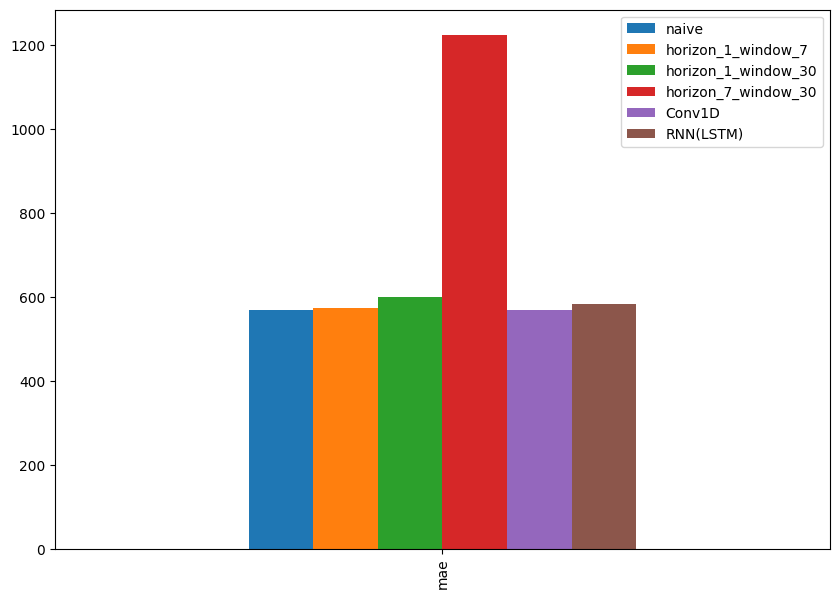

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"],
              "Conv1D": model_4_results["mae"],
              "RNN(LSTM)": model_5_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");